# Logistic Regression using Gradient Descent

## Introduction: 

In this blog post, I implement the Logistic Regression algorithm to linearly classify data. Unlike the Perceptron algorithm, which was implemented in blog post 1, the data does not have to be linearly separable for the LR algorithm to converge and provide an accurate weight vector, w, to separate our data.  
  
To implement this algorithm, we rely on Gradient Descent to perform most of the heavy lifting. Gradient Descent is an optimization algorithm which can be performed to minimize convex Empirical Loss functions.  

Here is the basic form of gradient descent:  

$$\theta_j := \theta_j - \alpha \frac{\partial}{\partial \theta_j} J(\theta_0, \theta_1, ..., \theta_n)$$

where $\theta_j$ is the $j^{th}$ parameter, $\alpha$ is the learning rate, and $J(\theta_0, \theta_1, ..., \theta_n)$ is the cost function. The partial derivative term $\frac{\partial}{\partial \theta_j} J(\theta_0, \theta_1, ..., \theta_n)$ represents the gradient of the cost function with respect to the $j^{th}$ parameter.

In the case of Logistic Regression, we will be seeking to minimize the Logistic Loss function, which has the form:  
  
$$-y\log(\sigma(\hat{y})) - (1-y)\log(1-\sigma(\hat{y}))$$

## Implementation:  

<a href="https://github.com/johnny-kantaros/gradient-descent/blob/main/LogisticRegression.py">See Source Code</a>

To implement my fit() algorithm, I followed these steps:  

1. Initialize w (weight vector) as random, X_ (padded input matrix)  
2. While there were more possible iterations AND no convergence reached:  
    1. Calculate new w using the gradient of the Log Loss  
    2. Calculate new loss using my empirical loss function
    3. Check if convergence has been reached  



## Experiments:  

In my following experiments, I test both my regular and stochastic gradient descent algorithm using both linearly separable and non-linearly separable data. As you will see, this algorithm is powerful and has the ability to quickly classify linearly separable data with 100% accuracy. Additionally, as mentioned above, this algorithm is superior to Perceptron, as it can still converge on non-linearly separable data. Finally, you will see how batch size affects convergence with stochastic gradient descent. 

### Experiment 1: Fitting our Logistic Regression model on Linearly Seperable Data

#### 1. Import relevant libraries

In [1]:
import numpy as np
from LogisticRegression import LogisticRegression

#### 2. Make Linearly separable data

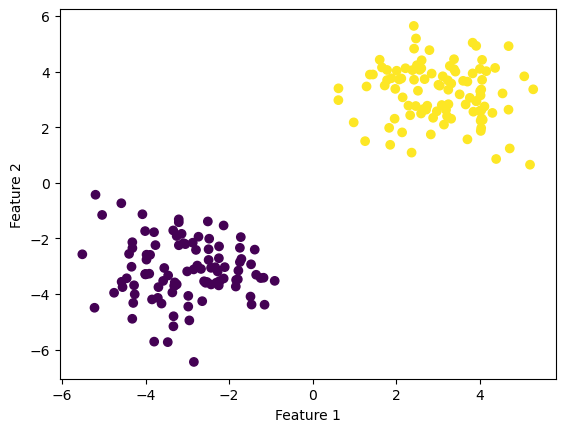

In [2]:
from sklearn.datasets import make_blobs
from matplotlib import pyplot as plt
import numpy as np
np.seterr(all='ignore') 

# make the data
p_features = 3
X, y = make_blobs(n_samples = 200, n_features = p_features - 1, centers = [(-3, -3), (3, 3)])

fig = plt.scatter(X[:,0], X[:,1], c = y)
xlab = plt.xlabel("Feature 1")
ylab = plt.ylabel("Feature 2")

#### 3. Fit our Logistic Regression model

In [3]:
# Make model object
LR = LogisticRegression()

# Fit the model (regular Gradient Descent)
# Parameters: 
# X (observations), 
# y (labels), 
# Alpha (learning rate), 
# Max_epochs (max steps)

LR.fit(X, y, .01, 500)

#### 4. Check our accuracy, weight vector, loss history

In [4]:
w = LR.w
prev_losses = LR.loss_history[-10:]
accuracy = LR.score(X, y)

print("Weight vector:" , w)
print("Loss History (Last 10 values):", prev_losses)
print("Accuracy:", accuracy)


Weight vector: [0.53060037 1.03812894 0.22214551]
Loss History (Last 10 values): [0.01359064301028081, 0.013567902748912198, 0.013545242129391994, 0.013522660729089156, 0.013500158128371145, 0.013477733910577258, 0.013455387661992462, 0.013433118971821187, 0.01341092743216168, 0.013388812637980507]
Accuracy: 1.0


#### Our model has 100% accuracy. Great! Now, let's visualize:  

#### 5. Visualize

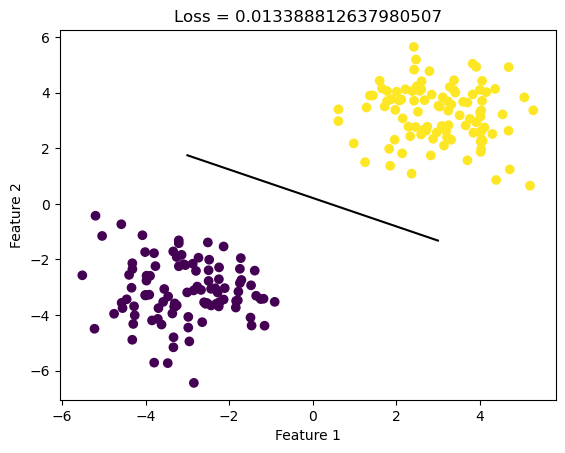

In [5]:
np.random.seed(123)

w = LR.w
loss = LR.loss_history[-1]

fig = plt.scatter(X[:,0], X[:,1], c = y)
xlab = plt.xlabel("Feature 1")
ylab = plt.ylabel("Feature 2")

f1 = np.linspace(-3, 3, 101)

p = plt.plot(f1, (w[2] - f1*w[0])/w[1], color = "black")
title = plt.gca().set_title(f"Loss = {loss}")

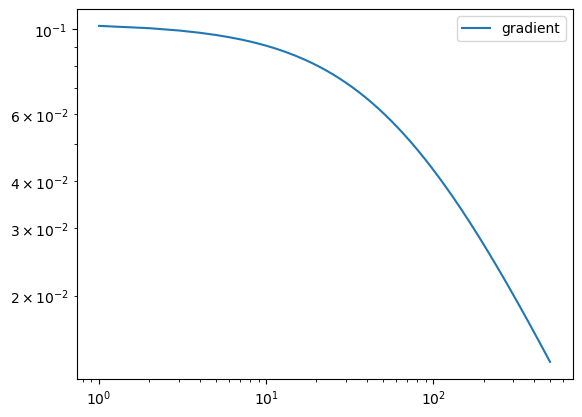

In [6]:
# Visualize gradient
num_steps = len(LR.loss_history)
plt.plot(np.arange(num_steps) + 1, LR.loss_history, label = "gradient")

plt.loglog()

legend = plt.legend()

### Experiment 2: Fitting our model on non-linear data:

##### Unlike the Perceptron model, our LR model should still converge on non-linearly seperable data. Although the accuracy will not be 100%, we can still create a fairly accurate and dependable model.

#### 1. Creating non-linearly separable data

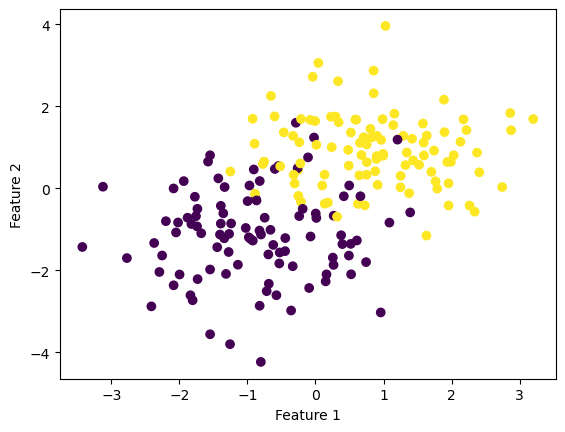

In [7]:
from sklearn.datasets import make_blobs
from matplotlib import pyplot as plt
import numpy as np
np.seterr(all='ignore') 

# make the data
p_features = 3
X, y = make_blobs(n_samples = 200, n_features = p_features - 1, centers = [(-1, -1), (1, 1)])

fig = plt.scatter(X[:,0], X[:,1], c = y)
xlab = plt.xlabel("Feature 1")
ylab = plt.ylabel("Feature 2")

#### 2. Fitting our model

In [8]:
LR = LogisticRegression()
LR.fit(X, y, .01, 500)

#### 3. Similar to above, let's analyze our weight vecor, loss history, and accuracy

In [9]:
w = LR.w
prev_losses = LR.loss_history[-10:]
accuracy = LR.score(X, y)

print("Weight vector:" , w)
print("Loss History (Last 10 values):", prev_losses)
print("Accuracy:", accuracy)

Weight vector: [0.92254418 0.97990169 0.12097902]
Loss History (Last 10 values): [0.26949815124089416, 0.2693895582048068, 0.26928132215690764, 0.2691734414180923, 0.26906591431970034, 0.2689587392034342, 0.2688519144212794, 0.26874543833542475, 0.2686393093181836, 0.2685335257519156]
Accuracy: 0.895


#### Even though our data is not linearly separable, we still achieved 88% accuracy! Let's visualize:

#### 4. Visualize:

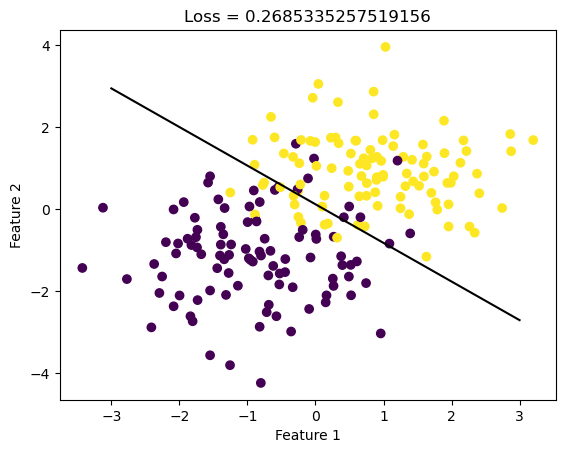

In [10]:

w = LR.w
loss = LR.loss_history[-1]

fig = plt.scatter(X[:,0], X[:,1], c = y)
xlab = plt.xlabel("Feature 1")
ylab = plt.ylabel("Feature 2")

f1 = np.linspace(-3, 3, 101)

p = plt.plot(f1, (w[2] - f1*w[0])/w[1], color = "black")
title = plt.gca().set_title(f"Loss = {loss}")

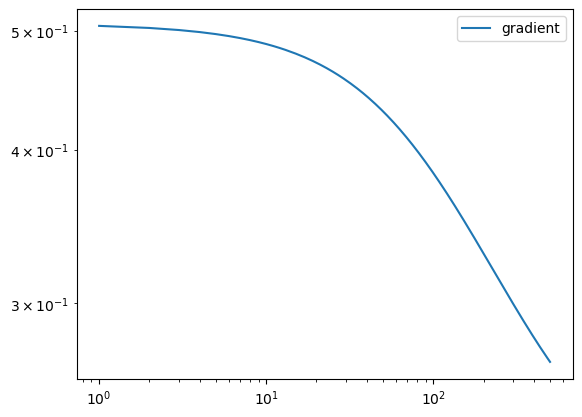

In [11]:
# Visualize gradient
num_steps = len(LR.loss_history)
plt.plot(np.arange(num_steps) + 1, LR.loss_history, label = "gradient")

plt.loglog()

legend = plt.legend()

### Experiment 3: Choosing a learning rate that is too high:

#### 1. Create data (let's choose linearly separable)

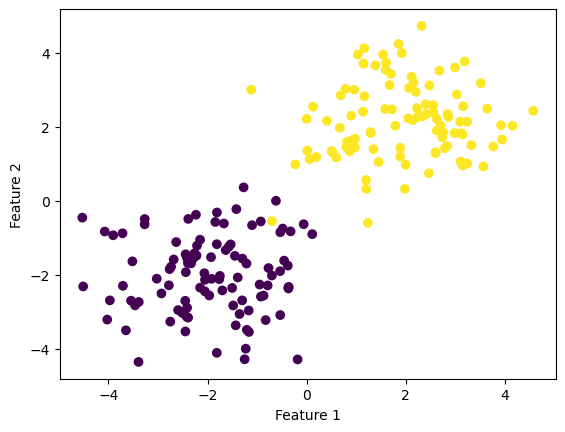

In [12]:
from sklearn.datasets import make_blobs
from matplotlib import pyplot as plt
import numpy as np
np.seterr(all='ignore') 

# make the data
p_features = 3
X, y = make_blobs(n_samples = 200, n_features = p_features - 1, centers = [(-2, -2), (2, 2)])

fig = plt.scatter(X[:,0], X[:,1], c = y)
xlab = plt.xlabel("Feature 1")
ylab = plt.ylabel("Feature 2")

#### 2. Fit our data. We will purposely choose a very high alpha to see how our model reacts

In [13]:
LR = LogisticRegression()
LR.fit(X, y, 20, 1000)

#### 3. Let's check our loss, score, and history. We expect this high alpha value to negatively impact our model:

In [14]:
w = LR.w
prev_losses = LR.loss_history[-10:]
accuracy = LR.score(X, y)

print("Weight vector:" , w)
print("Loss History (Last 10 values):", prev_losses)
print("Accuracy:", accuracy)

Weight vector: [2.850027   3.00822389 0.84316634]
Loss History (Last 10 values): [0.021210924821183027, 0.021210594407535185, 0.021210279995358138, 0.021209980850599792, 0.021209696269960256, 0.021209425579808868, 0.021209168135125037, 0.021208923318463236, 0.02120869053894295, 0.021208469231263564]
Accuracy: 0.995


#### However, we still achieve ~100% accuracy even with an alpha set at 20. Let's examine the gradient:

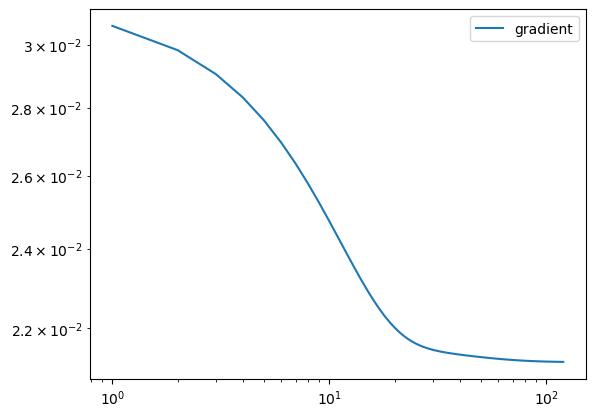

In [15]:
# Visualize gradient
num_steps = len(LR.loss_history)
plt.plot(np.arange(num_steps) + 1, LR.loss_history, label = "gradient")

plt.loglog()

legend = plt.legend()

#### Even though the gradient maintains the same shape as a lower alpha, there are noticeable bumps in the curve which show the effects of a higher alpha.

### Experiment 4: Comparing Stochastic vs Regular gradient descent

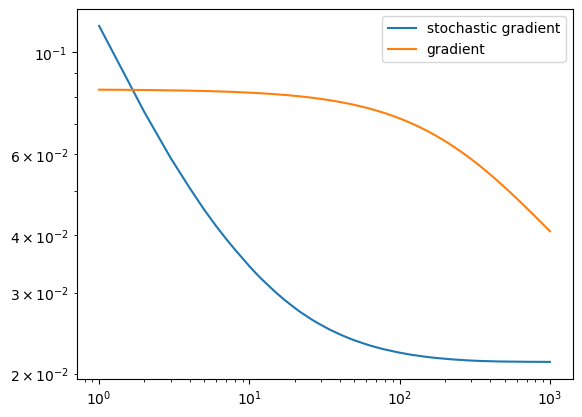

In [16]:

# Stochastic gradient descent
LR = LogisticRegression()
LR.fit_stochastic(X, y, 
                  max_epochs = 1000,  
                  batch_size = 10, 
                  alpha = .1)

num_steps = len(LR.loss_history)
plt.plot(np.arange(num_steps) + 1, LR.loss_history, label = "stochastic gradient")

# Regular gradient descent
LR = LogisticRegression()
LR.fit(X, y, alpha = .01, max_epochs = 1000)

num_steps = len(LR.loss_history)
plt.plot(np.arange(num_steps) + 1, LR.loss_history, label = "gradient")

plt.loglog()

legend = plt.legend()

As we can see, stochastic gradient descent, while slower, seems to produce a much better output than normal gradient descent. While normal gradient descent seems to eventually converge, stochastic gradient descent is far quicker in its convergence, which could be very important in machine learning applications.

### Experiment 5: Batch size vs Convergence

#### In this experiment, we want to see if batch size affects the model's convergent

#### 1. Fit two models, one with a small batch size and another with a large batch size

In [17]:
LR1 = LogisticRegression()
LR1.fit_stochastic(X, y, max_epochs = 1000, batch_size = 50, alpha = .1)

LR2 = LogisticRegression()
LR2.fit_stochastic(X, y, max_epochs = 1000, batch_size = 5, alpha = .1)

#### 2. Show convergence plots:

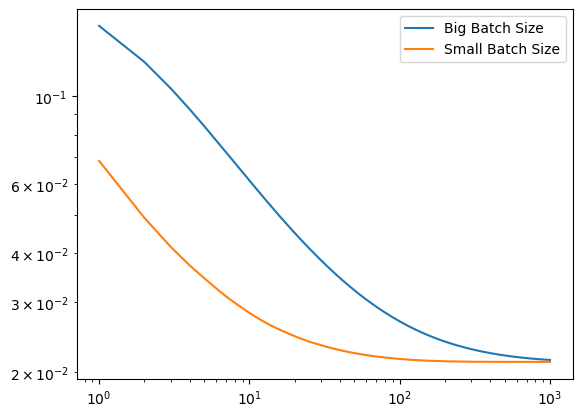

In [18]:
num_steps = len(LR1.loss_history)
plt.plot(np.arange(num_steps) + 1, LR1.loss_history, label = "Big Batch Size")

num_steps = len(LR2.loss_history)
plt.plot(np.arange(num_steps) + 1, LR2.loss_history, label = "Small Batch Size")

plt.loglog()

legend = plt.legend()

After running this experiment multiple times, it is evident that a smaller batch size leads to a quicker convergence than a larger batch size. This result is not intuitive, as one might expect a larger batch size to be more accurate.